In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Modelo Diferencial

## Diagrama

![all text](CasqueteSemiesférico.png)

![all text](CasqueteSemiesférico2.png)

## Variables

1. Variable independiente: posición radial $r$, m.
2. Variable dependiente: temperatura $T$, K.
3. Variables intermedias:

    a. Flujo de calor: $q_{r}$, kW.
    
    b. Área transversal: $A$, m$^2$.
4. Variables fijas:

    a. Temperatura externa: $T_{2}$, K.
    
    b. Temperatura interna: $T_{1}$, K.
    
    c. Radio exterior: $R_{2}$, m.
    
    d. Radio interior: $R_{1}$, m.
5. Parámetros:
    
    a. Conductividad térmica: $\kappa$, kW/(m K).
    
## Balance de energía:

1. Velocidad de acumulación: $V_{A}=0$
2. Flujo de entrada: $F_{E}=q_{r}A$
3. Flujo de salida: $F_{S}=q_{r}A+\delta(q_{r}A)$
4. Velocidad de generación: $V_{G}=0$
5. Velocidad de consumo: $V_{C}=0$

$$0=q_{r}A-q_{r}A-\delta (q_{r}A)$$
$$\Rightarrow\delta (q_{r}A)=0$$

### Relaciones constitutivas:

$$q_{r}=-\kappa \frac{dT}{dr}$$

### Resolviendo

Se tiene que $dA=r^2\sin{\theta}d\phi d\theta$:

$$\delta(q_{r}r^2\sin{\theta}d\phi d\theta)=0$$
$$\delta(q_{r}r^2)=0$$
$$\frac{\delta(q_{r}r^2)}{\delta r}=0$$

Ahora $\delta r\rightarrow 0$ y:

$$\Rightarrow r^2\frac{dq_{r}}{dr}+2rq_{r}=0$$

Sustituyendo:

$$\Rightarrow r^2\frac{d}{dr}\left(-\kappa \frac{dT}{dr}\right)+2r\left(-\kappa \frac{dT}{dr}\right)=0$$
$$\Rightarrow -\kappa r^2\frac{d^2T}{dr^2}-2\kappa r\frac{dT}{dr}=0$$

Dividiendo entre $-\kappa r^2$:

$$\frac{d^2T}{dr^2}+\frac{2}{r}\frac{dT}{dr}=0$$

# Solucionando la ecuación diferencial

Se busca usar factor integrante:

$$F_{I}=\exp{\left(\int_{0}^{r}\frac{2}{r'}dr'\right)}=r^2$$

Esto permite reescribir la ecuación como:

$$\frac{d}{dr}\left(r^2\frac{dT}{dr}\right)=0$$

Integrando:

$$r^2\frac{dT}{dr}=C_{1}$$
$$\Rightarrow \frac{dT}{dr}=\frac{C_{1}}{r^2}$$
$$\Rightarrow \int dT=\int\frac{C_{1}}{r^2}dr$$
$$T(r)=-\frac{C_{1}}{r}+C_{2}$$

$T(R_{1})=T_{1}$, $T(R_{2})=T_{2}$:
$$T_{1}=\frac{-C_{1}}{R_{1}}+C_{2}$$

$$T_{2}=\frac{-C_{1}}{R_{2}}+C_{2}$$

$$C_{2}=T_{2}+\frac{C_{1}}{R_{2}}$$
$$T_{1}=\frac{-C_{1}}{R_{1}}+T_{2}+\frac{C_{1}}{R_{2}}$$
$$T_{2}-T_{1}=\left(\frac{1}{R_{1}}-\frac{1}{R_{2}}\right)C_{1}$$

$$C_{1}=\left(T_{2}-T_{1}\right)\left(\frac{1}{R_{1}}-\frac{1}{R_{2}}\right)^{-1}$$
$$C_{2}=T_{2}+\frac{1}{R_{2}}\left(T_{2}-T_{1}\right)\left(\frac{1}{R_{1}}-\frac{1}{R_{2}}\right)^{-1}$$

Por tanto, la expresión para la distribución radial de la temperatura queda como:

$$T(r)=T_{2}+\frac{1}{R_{2}}\left(T_{2}-T_{1}\right)\left(\frac{1}{R_{1}}-\frac{1}{R_{2}}\right)^{-1}-\left(T_{2}-T_{1}\right)\left(\frac{1}{R_{1}}-\frac{1}{R_{2}}\right)^{-1}\frac{1}{r}$$

Reacomodando:

$$T(r)=T_{2}+\frac{T_{2}-T_{1}}{r\left(\frac{1}{R_{2}}-\frac{1}{R_{1}}\right)}-\frac{T_{2}-T_{1}}{R_{2}\left(\frac{1}{R_{2}}-\frac{1}{R_{1}}\right)}$$

Sustituyendo con las condiciones de trabajo:

$$T(r)=1523.15+\frac{1100}{\frac{-r}{24}}-\frac{1100}{1.6\cdot\frac{-1}{24}}$$
$$T(r)=1523.15-\frac{26400}{r}+16500$$
$$T(r)=18023.15-\frac{26400}{r}$$

## Comprobación del modelo

### Dimensionalidad

Se tiene que $T(r)$ debe tener unidades de Kelvin, el primer término $T_{2}$ cumple con esto, el segundo término, tiene unidades de la forma $K/(m\cdot1/m)$, de forma que también tiene unidades de Kelvin, y el último término también presenta estas unidades.

### Condición de contorno

Al evaluar el modelo en $R_{1}=1.5$, se obtiene como resultado $T_{1}=423.15$, lo que permite afirmar que el modelo cumple con la condición de contorno.

In [2]:
T1=150+273.15 # K
T2=1250+273.15 # K
R1=1.5 # m
R2=1.6 # m
k=0.015 # kW/m.K
h = 0.5e-02 # Step size
r = np.arange(R2,R1,-h) # Numerical grid

In [3]:
def T(r):
    return T2+(T2-T1)/(r*(1/R2-1/R1))-(T2-T1)/(R2*(1/R2-1/R1))

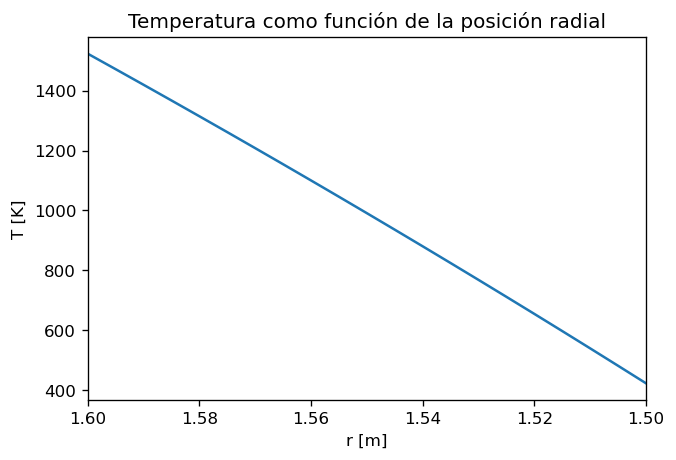

In [4]:
plt.figure(dpi=120)
plt.plot(r,T(r))
plt.xlim(R2,R1)
plt.title('Temperatura como función de la posición radial')
plt.xlabel('r [m]')
plt.ylabel('T [K]')
plt.show()

# Solución de la ecuación diferencial con métodos numéricos

Siguiendo la sugerencia, se busca resolver para $dT/dr$, entonces:

$$\frac{dq_{r}}{dr}=-\frac{2}{r}q_{r}$$

Con $q_{r}=-\kappa dT/dr$.

Se tomará un paso $h=0.5\times 10^{-2}\textrm{ m}$ y el radio irá de $1.6$ a $1.5$, con $q_{r}(1.6)=175\times 10^{3}\textrm{ W/m}^2$

In [5]:
# Define parameters
f = lambda r, q: -2*q/r# ODE
q0 = -175 # Initial Condition, kW/m^2.K

In [6]:
def dTAjuste(r,A):
    return A/r**2

### Método de Euler

In [7]:
def Euler(f):
    q = np.zeros(len(r))
    q[0] = q0
    for i in range(0, len(r) - 1):
        q[i + 1] = q[i] + h*f(r[i], q[i])
    return q/-k

In [8]:
dTdrEuler=Euler(f)
dTdrEuler

array([11666.66666667, 11593.75      , 11521.06191223, 11448.60240334,
       11376.37147335, 11304.36912226, 11232.59535005, 11161.05015674,
       11089.73354232, 11018.64550679, 10947.78605016, 10877.15517241,
       10806.75287356, 10736.57915361, 10666.63401254, 10596.91745037,
       10527.42946708, 10458.1700627 , 10389.1392372 , 10320.3369906 ,
       10251.76332288])

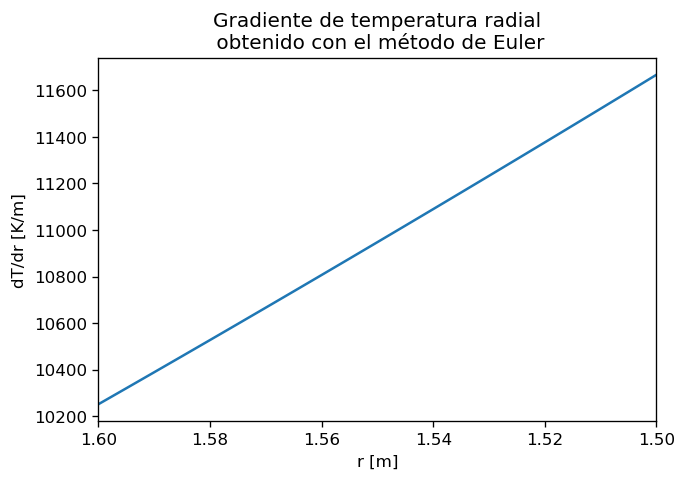

In [9]:
plt.figure(dpi=120)
plt.plot(np.arange(R1,R2,h),dTdrEuler)
plt.xlim(R2,R1)
plt.xlabel('r [m]')
plt.ylabel('dT/dr [K/m]')
plt.title('Gradiente de temperatura radial\n obtenido con el método de Euler')
plt.show()

Como se conocen los valores obtenidos para $dT/dr$, se puede integrar para conocer el cambio en la temperatura $\Delta T$

In [10]:
deltaTEuler=np.trapz(dTdrEuler,r)
deltaTEuler

-1095.1614746603736

### Runge-Kutta 4

In [11]:
def RK4(f):
    '''
    Esta función corresponde a una función que soluciona una EDO por RK4 iterando sobre un y = np.arange(y0,yf,h)
    
    Parámetros
    ------------------------
    f: función al lado derecho de la EDO
    ------------------------
    np.array(q): arreglo con los valores de p asociados a los valores de r.
    '''
    q = [q0]
    for i in range(len(r)-1):
        k1 = h*f(r[i],q[i])
        k2 = h*f(r[i]+h/2,q[i]+k1/2)
        k3 = h*f(r[i]+h/2,q[i]+k2/2)
        k4 = h*f(r[i]+h,q[i]+k3)
        q_r = q[i]+(k1+2*k2+2*k3+k4)/6
        q.append(q_r)
    return np.array(q)/-k

In [12]:
dTdrRK4=RK4(f)

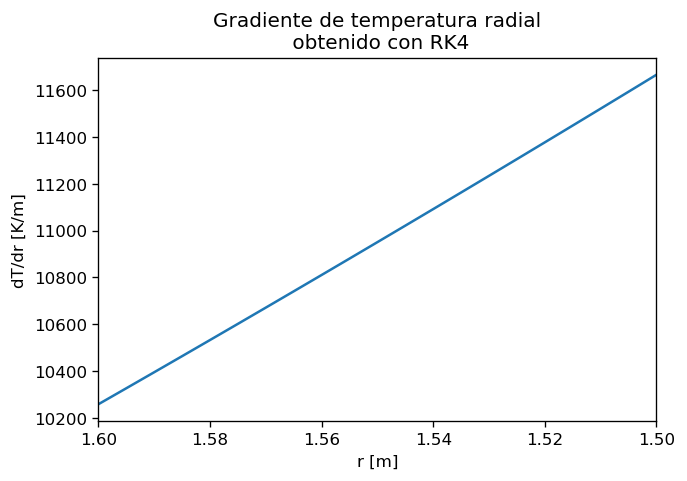

In [13]:
plt.figure(dpi=120)
plt.plot(np.arange(R1,R2,h),dTdrRK4)
plt.xlim(R2,R1)
plt.xlabel('r [m]')
plt.ylabel('dT/dr [K/m]')
plt.title('Gradiente de temperatura radial\n obtenido con RK4')
plt.show()

Como se conocen los valores obtenidos para $dT/dr$, se puede integrar para conocer el cambio en la temperatura $\Delta T$

In [14]:
deltaTRK4=np.trapz(dTdrRK4,r)
deltaTRK4

-1095.4886889693253

# Temperatura entre 1.6 m y 1.5 m

Se obtiene primero la derivada de la función $T(r)$, para luego ser integrada desde $r=1.6$ hasta $r=1.5$.

## Derivada analítica

Del modelo obtenido de solucionar la ecuación diferencia, se tiene que:

$$\frac{dT}{dr}=\frac{26400}{r^2}$$

In [15]:
def dT(r):
    return 26400/r**2

In [16]:
dTdr=dT(np.arange(R1,R2,h))
dTdr

array([11733.33333333, 11655.50049116, 11578.43954213, 11502.14031304,
       11426.59279778, 11351.78715399, 11277.71369986, 11204.36291101,
       11131.72541744, 11059.7920005 , 10988.55359001, 10918.00126136,
       10848.12623274, 10778.91986241, 10710.37364599, 10642.47921391,
       10575.22832879, 10508.612883  , 10442.62489617, 10377.25651281,
       10312.5       ])

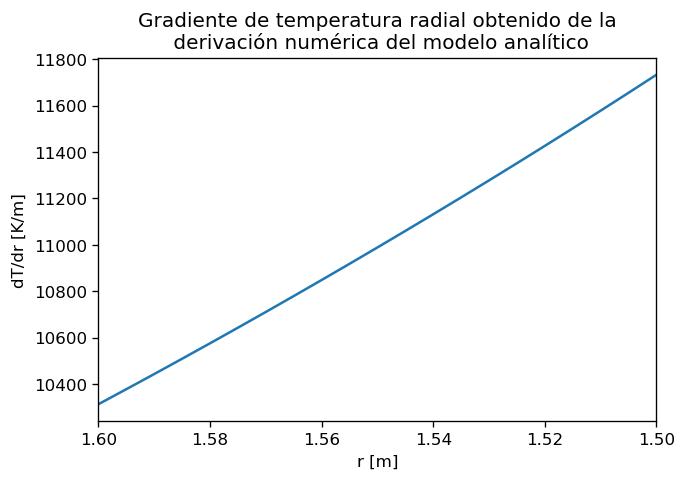

In [17]:
plt.figure(dpi=120)
plt.plot(np.arange(R1,R2,h),dTdr)
plt.xlim(R2,R1)
plt.xlabel('r [m]')
plt.ylabel('dT/dr [K/m]')
plt.title('Gradiente de temperatura radial obtenido de la\n derivación numérica del modelo analítico')
plt.show()

## Integración numérica

In [18]:
deltaT=np.trapz(dTdr,r)
deltaT

-1100.0057371038451

### Integración analítica
Se observa al integrar el gradiente se tiene que:

$$\frac{dT}{dr}=\frac{26400}{r^2}\Rightarrow \int_{T_2}^{T_{1}}dT=\int_{R_{2}}^{R_{1}}\frac{26400}{r^2}dr\Rightarrow \Delta T=\left[\frac{-26400}{r}\right]_{R_{2}}^{R_{1}}=\frac{-26400}{1.5}+\frac{26400}{1.6}=-1100$$

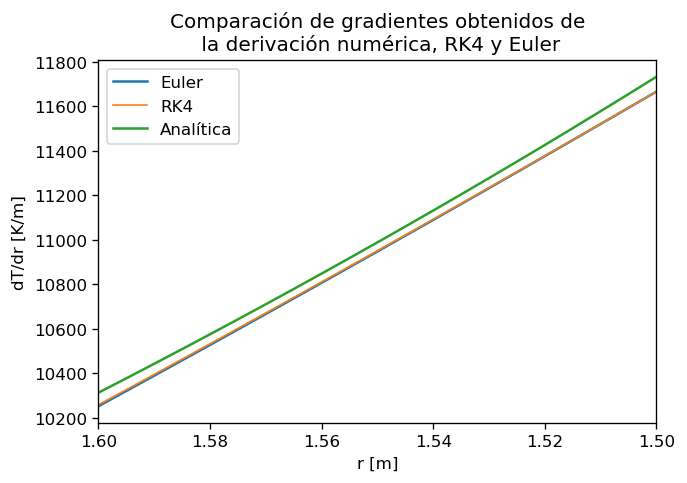

In [19]:
plt.figure(dpi=120)
plt.plot(np.arange(R1,R2,h),dTdrEuler,lw=1.5)
plt.plot(np.arange(R1,R2,h),dTdrRK4,lw=1)
plt.plot(np.arange(R1,R2,h),dTdr,lw=1.5)
plt.xlim(R2,R1)
plt.legend(['Euler','RK4','Analítica'])
plt.xlabel('r [m]')
plt.ylabel('dT/dr [K/m]')
plt.title('Comparación de gradientes obtenidos de\n la derivación numérica, RK4 y Euler')
plt.show()

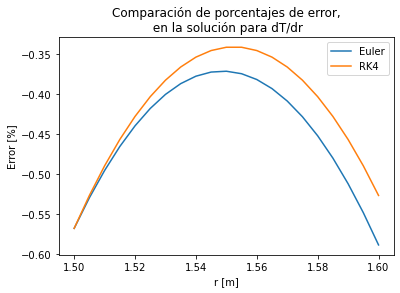

In [20]:
errorEuler=(dTdrEuler-dTdr)/dTdr*100
errorRK4=(dTdrRK4-dTdr)/dTdr*100
plt.plot(np.arange(R1,R2,h),errorEuler)
plt.plot(np.arange(R1,R2,h),errorRK4)
plt.legend(['Euler','RK4'])
plt.ylabel('Error [%]')
plt.xlabel('r [m]')
plt.title('Comparación de porcentajes de error,\n en la solución para dT/dr')
plt.show()

In [21]:
errordTEuler=abs(deltaTEuler--1100)/-1100*100
errordTEuler

-0.43986593996603257

In [22]:
errordTRK4=abs(deltaTRK4--1100)/-1100*100
errordTRK4

-0.4101191846067939

|Método|$\Delta T\textrm{ [K]}$|Error $[\%]$|
|:----:|:--------:|:---:|
|Euler|-1095.1614746603736|-0.43986593996603257|
|RK4|-1095.4886889693253|-0.4101191846067939|